<a href="https://colab.research.google.com/github/soobin2121/ML_EDU/blob/master/%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
docs = ['바나나 사과 포도 포도', 
       '사과 포도',
       '짜장면 짬뽕 탕수육',
       '볶음밥 탕수육',
       '짜장면 짬뽕',
       '된장찌개 김치찌개 김치 비빔밥',
       '김치 된장 비빔밥',
       '비빔밥 김치',
       '사과 볶음밥 김치 된장']

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [3]:
n_topic = 3

# 선언
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(docs)
svd = TruncatedSVD(n_components = n_topic)
u_sigma = svd.fit_transform(tfidf)


svd.components_

array([[ 0.60652075,  0.14957731,  0.3796519 ,  0.14957731,  0.04493668,
         0.20921667,  0.55444468,  0.23821322,  0.03094798,  0.03094798,
         0.07587651,  0.1601003 ],
       [-0.14469683, -0.06575197, -0.02154292, -0.06575197,  0.10501706,
         0.20441335, -0.204684  ,  0.26710025,  0.50979333,  0.50979333,
         0.40303151,  0.34883767],
       [-0.11426436, -0.05535086, -0.00950328, -0.05535086,  0.19843078,
        -0.01682087, -0.16906663,  0.46297182, -0.33315213, -0.33315213,
        -0.21901948,  0.65436346]])

In [4]:
vocab = tfidf_vect.get_feature_names()
n=3
for idx, topic in enumerate(svd.components_):
  print("Topic %d:" %(idx),[(vocab[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1 : -1]])

Topic 0: [('김치', 0.60652), ('비빔밥', 0.55444), ('된장', 0.37965)]
Topic 1: [('짬뽕', 0.50979), ('짜장면', 0.50979), ('탕수육', 0.40303)]
Topic 2: [('포도', 0.65436), ('사과', 0.46297), ('바나나', 0.19843)]


In [5]:
topic

array([-0.11426436, -0.05535086, -0.00950328, -0.05535086,  0.19843078,
       -0.01682087, -0.16906663,  0.46297182, -0.33315213, -0.33315213,
       -0.21901948,  0.65436346])

In [6]:
topic.argsort()

array([ 8,  9, 10,  6,  0,  1,  3,  5,  2,  4,  7, 11])

## 단어 백터간의 상관관계

In [7]:
# 행열이 바뀜( 세로 = 단어, 열 = 토픽)
svd.components_.T

array([[ 0.60652075, -0.14469683, -0.11426436],
       [ 0.14957731, -0.06575197, -0.05535086],
       [ 0.3796519 , -0.02154292, -0.00950328],
       [ 0.14957731, -0.06575197, -0.05535086],
       [ 0.04493668,  0.10501706,  0.19843078],
       [ 0.20921667,  0.20441335, -0.01682087],
       [ 0.55444468, -0.204684  , -0.16906663],
       [ 0.23821322,  0.26710025,  0.46297182],
       [ 0.03094798,  0.50979333, -0.33315213],
       [ 0.03094798,  0.50979333, -0.33315213],
       [ 0.07587651,  0.40303151, -0.21901948],
       [ 0.1601003 ,  0.34883767,  0.65436346]])

In [8]:
# vocab 순서 그대로 인덱스화 됨
vocab

['김치',
 '김치찌개',
 '된장',
 '된장찌개',
 '바나나',
 '볶음밥',
 '비빔밥',
 '사과',
 '짜장면',
 '짬뽕',
 '탕수육',
 '포도']

In [9]:
for i in range(len(vocab)) :
  print("{} : {}".format(vocab[i], svd.components_.T[i]))

김치 : [ 0.60652075 -0.14469683 -0.11426436]
김치찌개 : [ 0.14957731 -0.06575197 -0.05535086]
된장 : [ 0.3796519  -0.02154292 -0.00950328]
된장찌개 : [ 0.14957731 -0.06575197 -0.05535086]
바나나 : [0.04493668 0.10501706 0.19843078]
볶음밥 : [ 0.20921667  0.20441335 -0.01682087]
비빔밥 : [ 0.55444468 -0.204684   -0.16906663]
사과 : [0.23821322 0.26710025 0.46297182]
짜장면 : [ 0.03094798  0.50979333 -0.33315213]
짬뽕 : [ 0.03094798  0.50979333 -0.33315213]
탕수육 : [ 0.07587651  0.40303151 -0.21901948]
포도 : [0.1601003  0.34883767 0.65436346]


##  단어들,문장들끼리 유사도를 구할 수 있다

In [10]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

# 코사인 유사도
def cosine_similarity(a,b):
  return dot(a,b)/ (norm(a)* norm(b))

# 코사인 유사도를 사용해서 행렬의 유사도 구하기
def calc_similarity_matrix(vectors):
  n_word = len(vectors)
  calc_similarity_matrix = np.zeros((n_word, n_word))

  for i in range(n_word) :
    for j in range(i, n_word) :
      calc_similarity_matrix[j, i] = cosine_similarity(vectors[i], vectors[j])

  return calc_similarity_matrix


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity(similarity_matrix):
  uniform_data = similarity_matrix
  mask = np.triu(np.ones_like(similarity_matrix, dtype = np.bool))
  plt.rcParams['figure.figsize'] = [8,6]
  ax = sns.heatmap(uniform_data, mask = mask,
                   annot = True, fmt = '.2f', annot_kws= {'size':8},
                   cmap = 'coolwarm')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


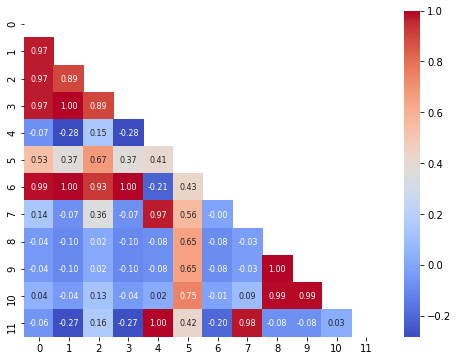

In [12]:
word_vectors = svd.components_.T
word_similarity_matrix = calc_similarity_matrix(word_vectors)
visualize_similarity(word_similarity_matrix)

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [18]:
%matplotlib inline
import matplotlib.font_manager as fm
import matplotlib



In [19]:
from sklearn.manifold import TSNE
import numpy as np
vectors = word_vectors
labels = tfidf_vect.get_feature_names()
def visualize_vectors(vectors, labels):
  tsne = TSNE(n_components = 2, random_state = 0, n_iter = 10000,
              perplexity =2)
  np.set_printoptions(suppress = True)
  T = tsne.fit_transform(vectors)

  plt.figure(figsize=(10,6))
  plt.scatter(T[:,0], T[:,1], c = 'orange', edgecolors = 'r')
  for label, x, y in zip(labels, T[:,0], T[:,1]):
                         plt.annotate(label, xy=(x+1, y+1), xytext =(0,0),
                                      textcoords = 'offset points',
                                      fontproperties = fontpath)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44608 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s

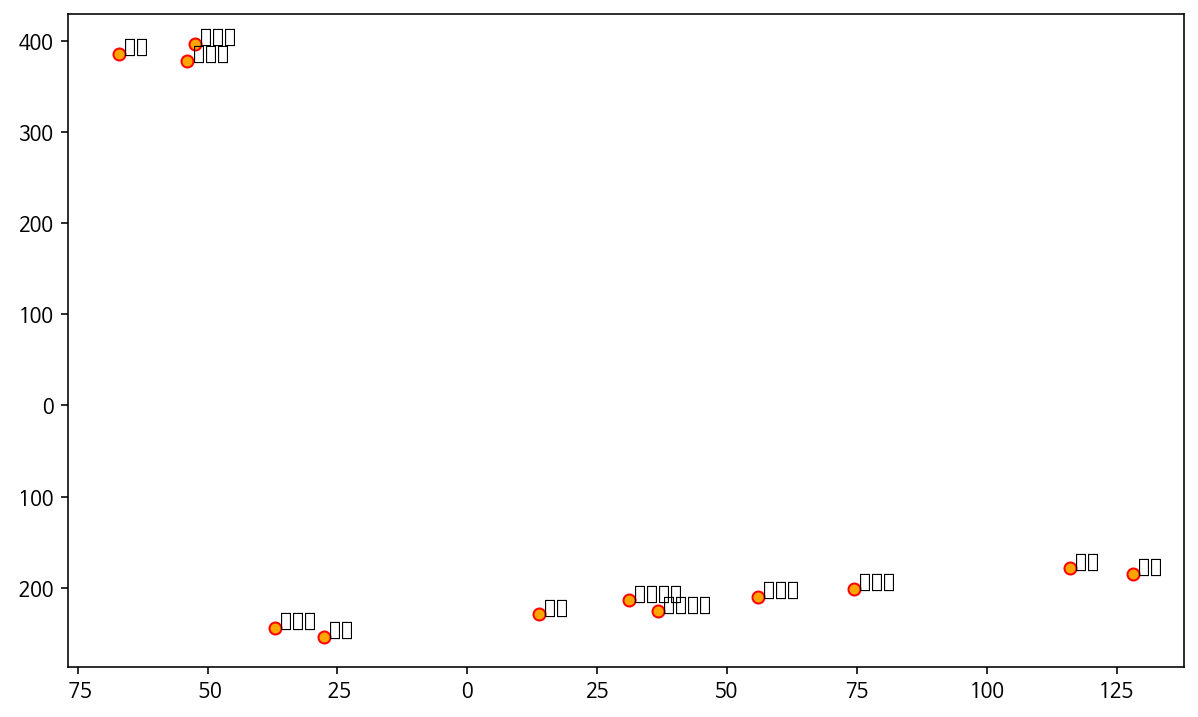

In [20]:
visualize_vectors(vectors, labels)